In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 
import random

S0 = 1e6
I0 = 10.0
R0 = 0.0
SUM = S0+I0+R0
r = 0.5
a = 0.33
T0 = 0.0
T = 150.0
N = 150

def fI(Sn, In):
    return 

def fR(In):
    return 

def fSIR(y):
    S, I, R = y
    dydt = np.array([-r * S * I / SUM, 
                     (r * S / SUM - a) * I, 
                     a * I])
    return dydt

def fSIR_func(y, t):
    dydt = fSIR(y)
    return dydt


def solve(solve_func, equation_func, y0, t):
    assert t.ndim == 1
    
    y = np.empty(shape=(t.shape[0], y0.shape[0]))
    y[0] = y0
    h = t[1] - t[0]
    solve_func(equation_func, y, h)
    return y

def arange(T0, T, h):
    N = int((T - T0)/h)
    assert float(N) == (T - T0)/h
    
    ret = np.empty(N+1)
    ret[0] = T0
    for i in range(N):
        #print(i, ret[i])
        ret[i+1] = ret[i]+h
        
    if ret[-1] - T > 1e-10:
        print("ret[-1] = ", ret[-1], ", T = ", T, sep = '')
        assert ret[-1] - T > 1e-10
    return ret

h = float((T-T0)/N)
t = arange(T0, T, h)
y0 = np.array([S0, I0, R0])

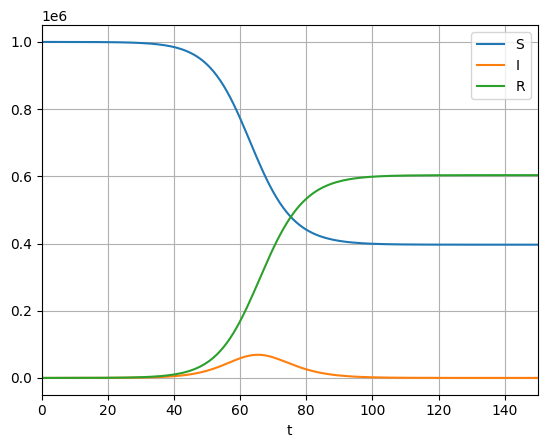

In [2]:
def EE(f, y, h):
    for n in range(1, y.shape[0]):
        y[n] = y[n-1] + h * f(y[n-1])

y0 = np.array([S0, I0, R0])
sol = solve(EE, fSIR, y0, t)

plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label='I')
plt.plot(t, sol[:, 2], label='R')

plt.legend(loc='best')
plt.xlabel('t')
plt.xlim(T0, T)
plt.grid(True)
plt.show()

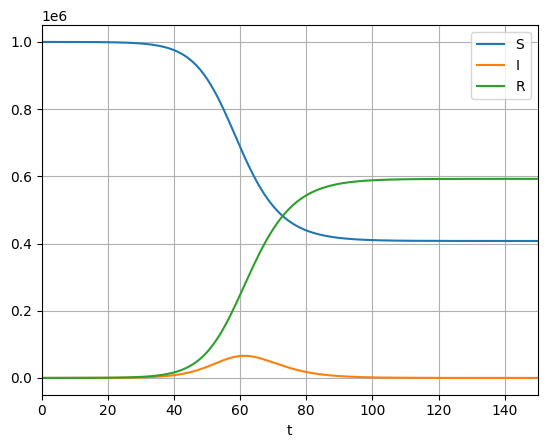

In [3]:
def Heun(f, y, h):
    for n in range(1, y.shape[0]):
        fnm1 = f(y[n-1])
        y[n] = y[n-1] + h/2 * (fnm1 + f(y[n-1] + h * fnm1))
        
sol = solve(Heun, fSIR, y0, t)

plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label='I')
plt.plot(t, sol[:, 2], label='R')

plt.legend(loc='best')
plt.xlabel('t')
plt.xlim(T0, T)
plt.grid(True)
plt.show()

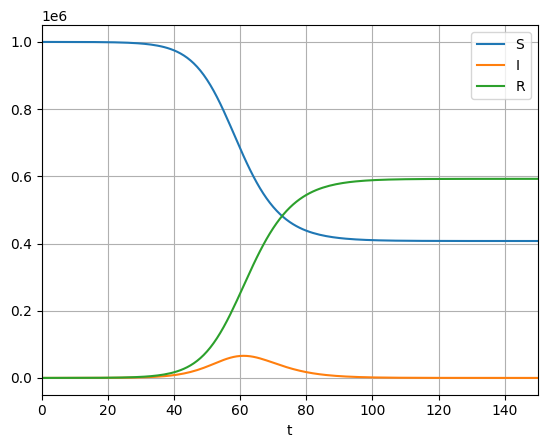

In [4]:
aB = [[ 0,   0,   0,   0 ], 
      [ 1/2, 0,   0,   0 ],
      [ 0,   1/2, 0,   0 ],
      [ 0,   0,   1,   0 ]]

bB =  [ 1/6, 1/3, 1/3, 1/6 ]

def Runge_Kutta(f, y, h):
    K = np.empty(shape=(4,3))
    for n in range(1, y.shape[0]):
        K[0] = f(y[n-1])
        K[1] = f(y[n-1] + h * aB[1][0] * K[0])
        K[2] = f(y[n-1] + h * (aB[2][0] * K[0] + aB[2][1] * K[1]))
        K[3] = f(y[n-1] + h * (aB[3][0] * K[0] + aB[3][1] * K[1]) + aB[3][2] * K[2])

        y[n] = y[n-1] + h * (bB[0] * K[0] + bB[1] * K[1] + bB[2] * K[2] + bB[3] * K[3])
        
sol = solve(Runge_Kutta, fSIR, y0, t)

plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label='I')
plt.plot(t, sol[:, 2], label='R')

plt.legend(loc='best')
plt.xlabel('t')
plt.xlim(T0, T)
plt.grid(True)
plt.show()

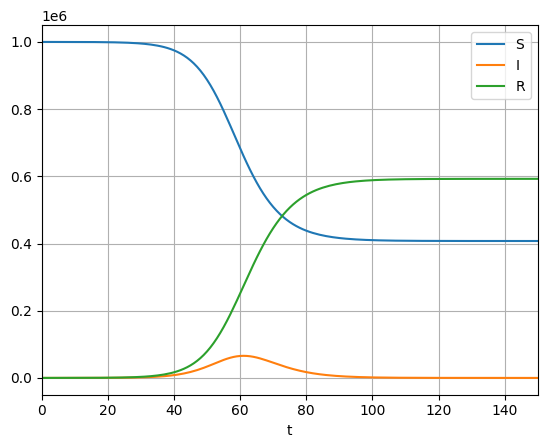

In [5]:
from scipy.integrate import odeint

sol = odeint(fSIR_func, y0, t)

plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label='I')
plt.plot(t, sol[:, 2], label='R')

plt.legend(loc='best')
plt.xlabel('t')
plt.xlim(T0, T)
plt.grid(True)
plt.show()

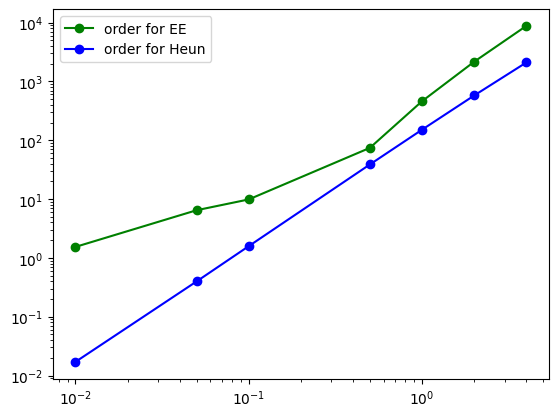

In [6]:
T0, T = 52.0, 60.0
sol = odeint(fSIR_func, y0, [0, T0, 57, T], atol=1.e-8)

y52=sol[1]
y60=sol[3]

error_listEE = []
error_listHeun = []
error_listRK = []
hs = [0.01, 0.05, 0.1, 0.5, 1, 2, 4]

for h in hs:
    t = arange(T0, T, h)
    
    solEE = solve(EE, fSIR, y52, t)
    S_EE_T_h = solEE[-1][0]
    error_listEE.append(np.abs(S_EE_T_h-y60[0]))
    
    solHeun = solve(Heun, fSIR, y52, t)
    S_Heun_T_h = solHeun[-1][0]
    error_listHeun.append(np.abs(S_Heun_T_h-y60[0]))
    
    #solRK = solveSIR(Runge_Kutta, fSIR y52, t)
    #S_RK_T_h = solRK[-1][0]
    #error_listRK.append(np.abs(S_RK_T_h-y60[0]))
    
plt.loglog(hs, error_listEE, 'g-o', label='order for EE')
plt.loglog(hs, error_listHeun, 'b-o', label='order for Heun')
#plt.loglog(hs, error_listRK, 'r-o', label='order for RK')
plt.legend(loc='best')
plt.show()

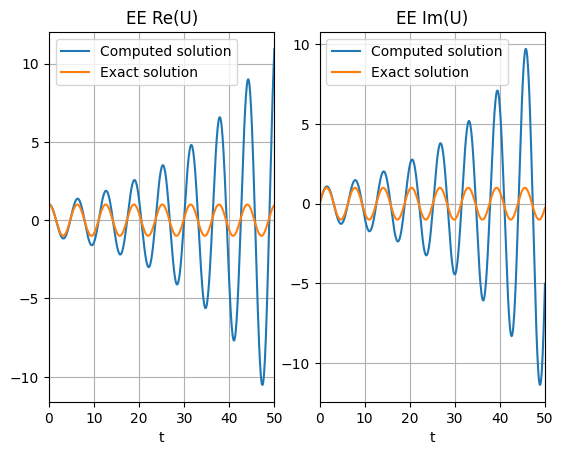

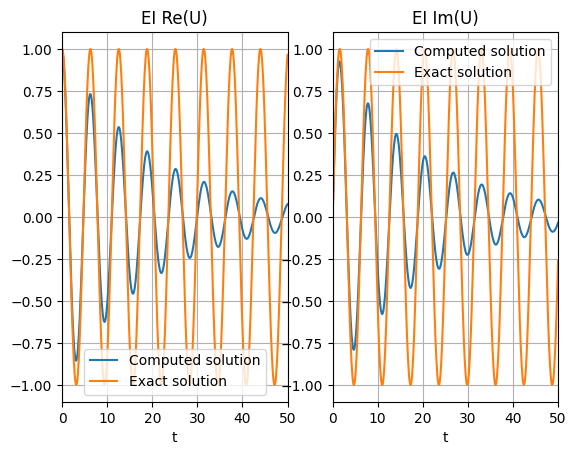

In [7]:
T0 = 0
T = 50
h = 0.1

def f(z):
    return np.array([-z[1],z[0]])

def f_EI(z, h):
    x, y = z
    x_new = (x - h * y)/(1+h*h)
    y_new = y + h * x_new
    return x_new, y_new

def EI(f, U, h):
    for n in range(1, U.shape[0]):
        U[n] = f(U[n-1], h)

def study_stability(T0, T, h):
    t = arange(T0, T, h)
    x = np.cos(t)
    y = np.sin(t)
    U0=np.array([1, 0])

    solEE = solve(EE, f, U0, t)
    solEI = solve(EI, f_EI, U0, t)


    ax1 = plt.subplot(1,2,1)
    ax1.title.set_text('EE Re(U)')
    plt.plot(t, solEE[:, 0], label='Сomputed solution')
    plt.plot(t, x, label='Exact solution')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.xlim(T0, T)
    plt.grid(True)

    ax2 = plt.subplot(1,2,2)
    ax2.title.set_text('EE Im(U)')
    plt.plot(t, solEE[:, 1], label='Сomputed solution')
    plt.plot(t, y, label='Exact solution')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.xlim(T0, T)
    plt.grid(True)

    plt.show()


    ax1 = plt.subplot(1,2,1)
    ax1.title.set_text('EI Re(U)')
    plt.plot(t, solEI[:, 0], label='Сomputed solution')
    plt.plot(t, x, label='Exact solution')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.xlim(T0, T)
    plt.grid(True)

    ax2 = plt.subplot(1,2,2)
    ax2.title.set_text('EI Im(U)')
    plt.plot(t, solEI[:, 1], label='Сomputed solution')
    plt.plot(t, y, label='Exact solution')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.xlim(T0, T)
    plt.grid(True)

    plt.show()
    
study_stability(T0, T, h)

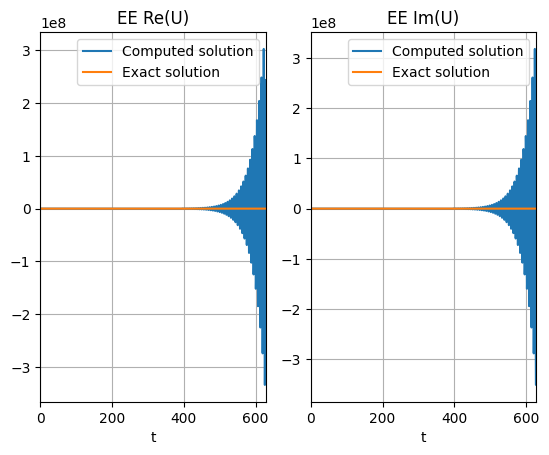

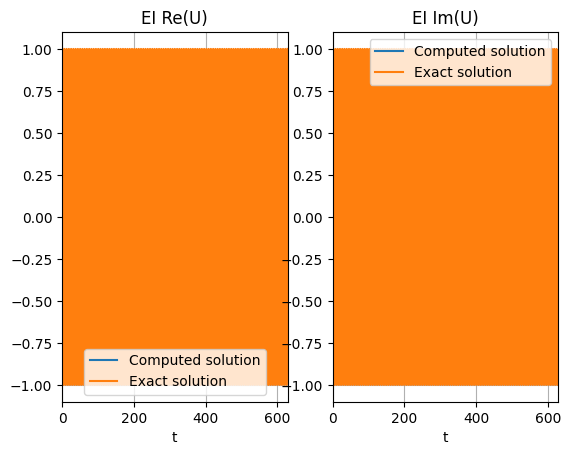

In [8]:
T0 = 0
T = 100*2*np.pi
h = 2*np.pi/100

study_stability(T0, T, h)